Closely Following

&copy; Manohar Swamynathan 2019

M. SwamynathanMastering Machine Learning with Python in Six Steps

https://doi.org/10.1007/978-1-4842-4947-5_7

Step 6: Deep and Reinforcement Learning
=======================================
> The main objective of deep learning algorithms so far has been to use ML to achieve artificial general intelligence (AGI) (i.e., replicate human level intelligence in machines to solve any problems for a given area).
>
> In this chapter, you'll learn about deep learning's core concepts, evolution (perceptron to convolutional neural network [CNN]), key applications, and implementation.


Artificial Neural Network (ANN)
-------------------------------

### Perceptron -- Single Artificial Neuron
> Inspired by the biological neurons, McCulloch and Pitts in 1943 introduced the concept of perceptron as an artificial neuron, which is the basic building block of an ANN.
>
> A biological neuron has dendrites to receive signals, a cell body to process them, and an axon/axon terminal to transfer signals out to other neurons. Similaryly, an artificial neuron has multiple input channels to accept training samples represented as a vector, and a processing stage where the weights ($W$) are adjusted such that the output error (actual vs. predicted) is minimized. Then the result is fed into an activation function to produce output, for example, a classification label. The activation function for a classification problem is a threshold cutoff (standard is 0.5) above which class is 1, else 0.


Prediction: [0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1]
Actual    : [0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1]
Accuracy  : 100.0%
X1 Coefficient: 0.004250654246024207
X2 Coefficient: -0.0013448411919664378
Intercept     : [-0.002]


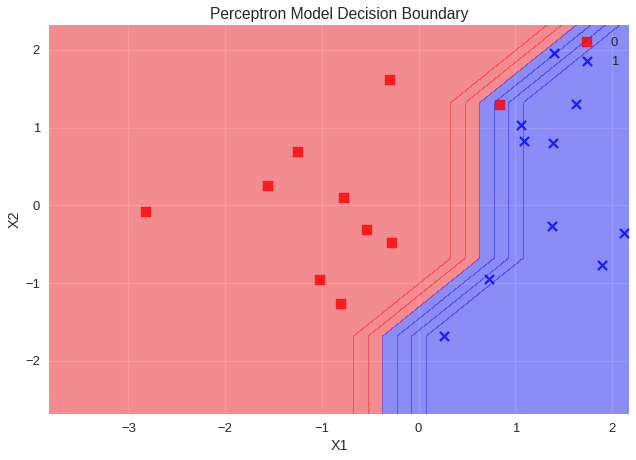

In [1]:
from sklearn.linear_model import perceptron
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(['seaborn-darkgrid', 'seaborn-talk'])
seed = 2020

X, y = make_classification(20, 2, 2, 0, weights=[.5, .5], random_state=seed)

clf = perceptron.Perceptron(max_iter=100, verbose=0, random_state=seed, fit_intercept=True, eta0=0.002, n_jobs=-1)
clf.fit(X, y)

print("Prediction:", clf.predict(X))
print("Actual    :", y)
print(f"Accuracy  : {clf.score(X, y)*100}%")

print("X1 Coefficient:", clf.coef_[0, 0])
print("X2 Coefficient:", clf.coef_[0, 1])
print("Intercept     :", clf.intercept_)

def plot_decision_regions(X, y, classifier, ax):
#     h = .05    # Step size in the mesh
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max), np.arange(x2_min, x2_max))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)

fig, ax = plt.subplots()

plot_decision_regions(X, y, classifier=clf, ax=ax)
plt.title("Perceptron Model Decision Boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

> **Note**:
> The drawback of the single perceptron approach is that it can only learn linearly separable functions.

### Multilayer Perceptrons (Feedforward Neural Network)
> To address the drawback of the single perceptron, multilayer perceptrons was proposed, also commonly known as a feedforward neural network. It is a composition of multiple perceptrons connected in different ways and operating on distrinctive activation functions, to enable improved learning mechanism. The training sample propagates forward through the network and the output error is back propagated; the error is minimized using a gradient descent method, which will calculate a loss function for all the weights in the network.
>
> The activation function for a simple one-level hidden layer of a multilayer perceptron can be given by:
\begin{equation}
f(x) = g \left\{ \sum_{j=0}^M W_{kj}^{(2)} g \left[ \sum_{i=0}^d W_{ji}^{(1)} x_i \right] \right\},
\end{equation}
> where $x_i$ is the input and $W_{ji}^{(1)}$ is the input layer weights and $W_{kj}^{(2)}$ is the weight of the hidden layer.
>
> The multilayered neural network can have many hidden layers, where the network holds its internal abstract representation of the training sample. The upper layers will be building new abstractions on top of the previous layers. So having more hidden layers for the complex dataset will help the neural network to learn better.
>
> Note that using too few neurons for the complex dataset can result in an underfitted model, due to the fact that it might fail to learn the patterns in complex data. However, using too many neurons can result in an overfitted model, as it has the capacity to capture a pattern that might be noise or specific for the given training data set. So, to build an efficient multilayered neural network, the fundamental questions to be answered about hidden layers for implementation are:
>
> 1. What is the ideal number of hidden layers?
> 2. What should be the number of neurons in hidden layers?
>
> The widely accepted rule of thumb is that you can start with one hidden layer, as there is a theory that one hidden layer is sufficient for the majority of problems. Then gradually increase the layers on a trial and error basis to see if there is any improvement in accuracy. The number of neurons in the hidden layer can ideally be the mean of the neurons in the input and output layers.


We have 1797 samples


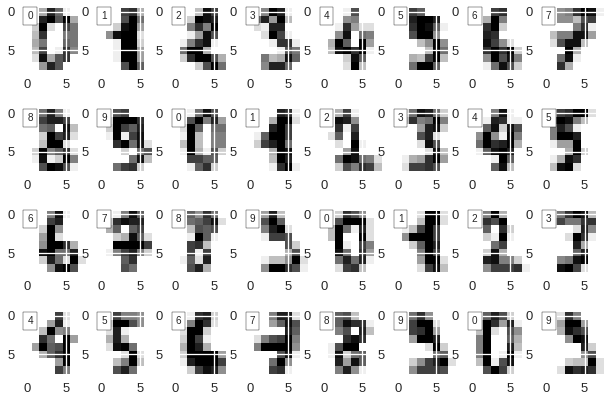

In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

np.random.seed(seed=seed)

digits = load_digits()
print(f"We have {len(digits.target)} samples")

fig, ax = plt.subplots(4, 8)

for i in range(32):
    r = i // 8
    c = i % 8
    ax[r, c].imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax[r, c].text(0, 1, digits.target[i], bbox=dict(facecolor='white'))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=seed)
print("Number of samples in training set:", len(y_train))
print("Number of samples in test     set:", len(y_test))

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100), activation="logistic", max_iter=100)

mlp.fit(X_train_scaled, y_train)

Number of samples in training set: 1437
Number of samples in test     set: 360


MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=100)

In [4]:
MLPClassifier(activation="logistic", alpha=0.0001, batch_size="auto", beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-8, hidden_layer_sizes=(30, 30, 30), learning_rate="constant", learning_rate_init=0.001, max_iter=100, momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver="adam", tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)

print("Training set score:", mlp.score(X_train_scaled, y_train))
print("Test     set score:", mlp.score(X_test_scaled, y_test))

Training set score: 0.9902574808629089
Test     set score: 0.9833333333333333


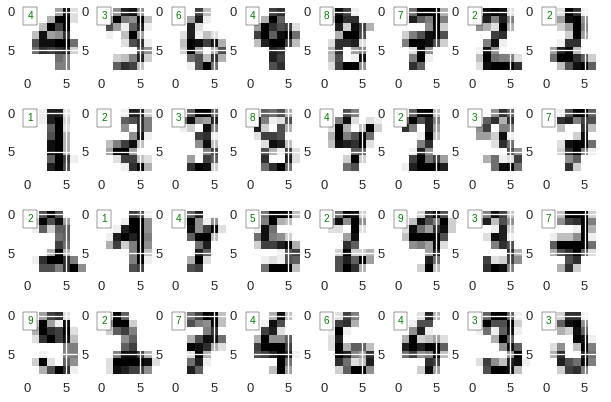

In [5]:
X_test_predicted = mlp.predict(X_test_scaled)
X_test_reshaped = X_test.reshape(-1, 8, 8)

fig, ax = plt.subplots(4, 8)

for i in range(32):
    r = i // 8
    c = i % 8
    axis = ax[r, c]
    axis.imshow(X_test_reshaped[i], cmap=plt.cm.gray_r)

    if (X_p := X_test_predicted[i]) == y_test[i]:
        axis.text(0, 1, X_p, color="green", bbox=dict(facecolor='white'))
    else:
        axis.text(0, 1, X_p, color="red", bbox=dict(facecolor='white'))

### Restricted Boltzman Mahines (RBMs)
> An RBM algorithm was proposed by Geoffrey Hinton (2007) that learns a probability distribution over its sample training data inputs. It has seen wide applications in different areas of supervised/unsupervised ML such as feature learning, dimensionality reduction, classification, collaborative filtering, and topic modeling.
>
> The energy function is given by
\begin{equation}
E(v, h) = -a^T v - b^T h - v^T Wh.
\end{equation}
> The probability function of a visible input layer can be given by
\begin{equation}
f(v) = -a^T v - \sum_i \log \sum_{h_i} \mathrm{e}^{h_i (b_i + W_i v)}.
\end{equation}
>
> Let's build a logistic regression model on a digits dataset with BernoulliRBM and compare its accuracy with a straight logistic regression (without BernoulliRBM) model's accuracy.


In [6]:
from scipy.ndimage import convolve

def nudge_dataset(X, Y):
    """This produces a dataset 5 times bigger than the original one, by moving the 8*8 images in X around by 1px to left, right, down, and up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],
        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],
        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],
        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]
    ]
    shift = lambda x, w: convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()
    X = np.concatenate([X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)

    return X, Y

> The BernoulliRBM assumes that the columns of our feature vectors fall within the range 0 to 1. However, the MNIST dataset is represented as unsigned 8-bit integers, falling within the range of 0 to 255.
>
> Define a function to scale the columns into the range (0, 1). The scale function takes two parameters: our data matrix X and an epsilon value used to prevent division by zero errors.

In [7]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
y = digits.target

X, y = nudge_dataset(X, digits.target)

# Scale the features such that the values are between 0 and 1 scale
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(f"{X.shape = }")
print(f"{y.shape = }")

X.shape = (8985, 64)
y.shape = (8985,)


In [8]:
# Grid search for logistic regression
# Perform a grid search on the 'C' parameter of Logistic
params = {"C": [1., 10., 100.]}

Grid_Search = GridSearchCV(LogisticRegression(), params, n_jobs=-1, verbose=1)
Grid_Search.fit(X_train, y_train)

# Print diagnostic information to the user
print(f"Best Score: {Grid_Search.best_score_:.3f}")
# Grab the best model
bestParams = Grid_Search.best_estimator_.get_params()

bestParams.items()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.5s finished
Best Score: 0.791


dict_items([('C', 10.0), ('class_weight', None), ('dual', False), ('fit_intercept', True), ('intercept_scaling', 1), ('l1_ratio', None), ('max_iter', 100), ('multi_class', 'auto'), ('n_jobs', None), ('penalty', 'l2'), ('random_state', None), ('solver', 'lbfgs'), ('tol', 0.0001), ('verbose', 0), ('warm_start', False)])

In [9]:
# Evaluate using LogisticRegression and only the raw pixel
logistic = LogisticRegression(C=100)
logistic.fit(X_train, y_train)

print("Train accuracy:", metrics.accuracy_score(y_train, logistic.predict(X_train)))
print("Test  accuracy:", metrics.accuracy_score(y_test, logistic.predict(X_test)))

Train accuracy: 0.8128825820812465
Test  accuracy: 0.7979966611018364


> Let's perform a grid search for an RBM + logistic regression model -- a grid search on the learning rate, number of iterations, and number of components on the RBM and C for logistic regression.

In [10]:
rbm = BernoulliRBM()
logistic = LogisticRegression()
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])

params = {
    "rbm__learning_rate": [0.1, 0.01, 0.001],
    "rbm__n_iter": [20, 40, 80],
    "rbm__n_components": [50, 100, 200],
    "logistic__C": [1., 10., 100.]
}

# Perform a grid search over the parameter
Grid_Search = GridSearchCV(classifier, params, n_jobs=-1, verbose=1)
Grid_Search.fit(X_train, y_train)

print(f"Best Score: {Grid_Search.best_score_:.3f}")
print(f"RBM + Logistic Regression parameters")
bestParams = Grid_Search.best_estimator_.get_params()

for p in sorted(params.keys()):
    print(f"\t {p}: {bestParams[p]}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 12.1min finished
Best Score: 0.910
RBM + Logistic Regression parameters
	 logistic__C: 100.0
	 rbm__learning_rate: 0.1
	 rbm__n_components: 200
	 rbm__n_iter: 20


In [11]:
rbm = BernoulliRBM(n_components=200, n_iter=20, learning_rate=0.1, verbose=False)
logistic = LogisticRegression(C=100)

classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train, y_train)

print(metrics.accuracy_score(y_train, classifier.predict(X_train)))
print(metrics.accuracy_score(y_test, classifier.predict(X_test)))

0.9467167501391207
0.9332220367278798


Text(0.5, 0.98, '200 components extracted by RBM')

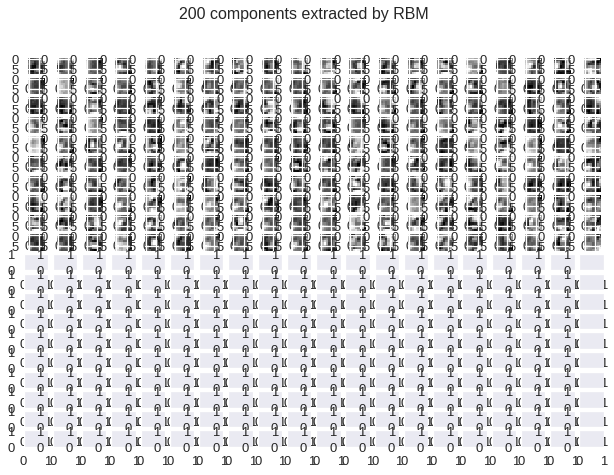

In [12]:
fig, ax = plt.subplots(20, 20)
for i, comp in enumerate(rbm.components_):
    r = i // 20
    c = i % 20
    ax[r, c].imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation="nearest")

plt.suptitle("200 components extracted by RBM", fontsize=16)

> Notice that the logistic regression model with RBM lifts the model score by more than 10% compared with the model without RBM.
>
> Stacked RBM is known as a deep believe network (DBN), which is an initialization technique. However, this technique was popular during 2006-2007 but is reasonably outdated.

### MLP Using Keras
> In Keras, neural networks are defined as a sequence of layers, and the container for these layers is the sequential class. The sequential model is a linear stack of layers; each layer's output feeds into the next layer's input.

X_train = array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
X_test = array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
X_train.shape = (60000, 784)
60000 train samples
10000 test samples


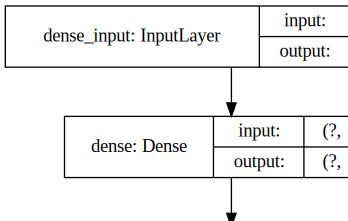

In [2]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
from IPython.display import SVG

np.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10
# Flatten 28 * 28 images to a 784 vector for each image
input_unit_size = 28 * 28

X_train = X_train.reshape(X_train.shape[0], input_unit_size).astype('float32')
X_test = X_test.reshape(X_test.shape[0], input_unit_size).astype('float32')
print(f"{X_train = }")
print(f"{X_test = }")

# One-hot representation, required for multiclass problems
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print(f"{X_train.shape = }")
print(f"{X_train.shape[0]} train samples\n{X_test.shape[0]} test samples")

# Create a model
model = Sequential()
model.add(Dense(input_unit_size, input_dim=input_unit_size, kernel_initializer="normal", activation="relu"))
model.add(Dense(nb_classes, kernel_initializer="normal", activation="softmax"))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

In [3]:
# Model training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=500, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Error: {100 - scores[1] * 100:.2f}%")

Epoch 1/5
120/120 - 2s - loss: 12.2454 - accuracy: 0.8769 - val_loss: 2.9646 - val_accuracy: 0.9361
Epoch 2/5
120/120 - 1s - loss: 1.7105 - accuracy: 0.9499 - val_loss: 1.9130 - val_accuracy: 0.9454
Epoch 3/5
120/120 - 2s - loss: 0.8499 - accuracy: 0.9665 - val_loss: 1.4417 - val_accuracy: 0.9554
Epoch 4/5
120/120 - 2s - loss: 0.4878 - accuracy: 0.9758 - val_loss: 1.4319 - val_accuracy: 0.9581
Epoch 5/5
120/120 - 2s - loss: 0.3375 - accuracy: 0.9809 - val_loss: 1.2444 - val_accuracy: 0.9620
Error: 3.80%


In [4]:
import pandas as pd

# Load pima indians dataset
dataset = pd.read_csv("../data/Diabetes.csv")

# Split into input (X) and output (y) variables
X = dataset.iloc[:, :8].values
y = dataset['class'].values

# Create a model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer="uniform", activation="relu"))
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

# Fit the model
model.fit(X, y, epochs=5, batch_size=10)
# Evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1] * 100:.2f}%")

Epoch 1/5
77/77 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6445
Epoch 2/5
77/77 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6393
Epoch 3/5
77/77 [==============================] - 0s 698us/step - loss: 0.6437 - accuracy: 0.6523
Epoch 4/5
77/77 [==============================] - 0s 613us/step - loss: 0.6365 - accuracy: 0.6576
Epoch 5/5
24/24 [==============================] - 0s 637us/step - loss: 0.6147 - accuracy: 0.6680
accuracy: 66.80%


Autoencoders
------------
> As the name suggests, an autoencoder aims to learn to encode a representation of a training sample data automatically without human intervention. The autoencoder is widely used for dimensionality reduction and data denoising.
>
> Building an autoencoder will typically have three elements:
> 1. Encoding function to map input to a hidden representation through a nonlinear function, $z = \text{sigmoid} (Wx + b)$.
> 2. A decoding function such as $x' = \text{sigmoid} (W' y + b')$, which will map back into reconstruction $x'$ with the same shape as $x$.
> 3. A loss function, which is a distance function to measure the information loss between the compressed representation of data and the decompressed representation. Reconstruction error can be measured using traditional squared error $\lVert x - z \rVert^2$.
>
> We'll be using the well-known MNIST database of handwritten digits, which consists of approximately 70,000 total samples of handwritten grayscale digit images for numbers 0 to 9. Each image is of $28 \times 28$ size and intensity level varies from 0 to 255, with accompanying label integer 0 to 9 for 60,000 of them and the remainder without label (test data set).

### Dimension Reduction Using an Autoencoder

In [5]:
from keras.models import Model
from keras.layers import Input
from keras.optimizers import Adadelta
from keras.utils import np_utils

def draw_digit(data, row, col, n):
    """function to plot digits"""
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)
    plt.imshow(data.reshape(size, size))
    plt.gray()

# Load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train.reshape(X_train.shape[0], input_unit_size).astype('float32')
X_train /= 255
print(f"{X_train.shape = }")

X_train.shape = (60000, 784)


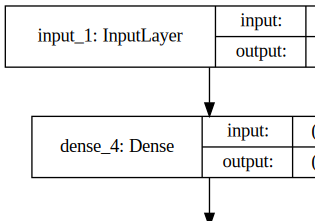

In [6]:
# Autoencoder
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation="relu")(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss="mse")

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7649
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3660
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0333
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8714
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7798


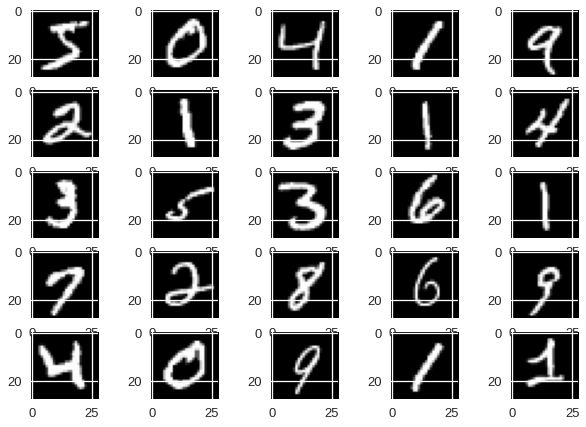

In [7]:
model.fit(X_train, y_train, epochs=5)

# Plot the images from input layers
show_size = 5
total = 0

for i in range(show_size ** 2):
        draw_digit(X_train[total], show_size, show_size, total+1)
        total += 1

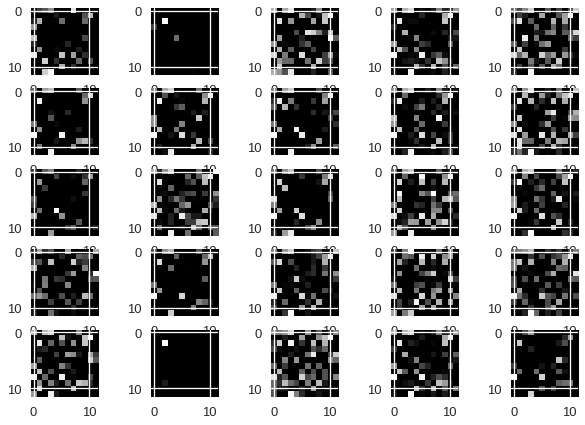

In [8]:
from keras import backend as K

# Plot the encoded (compressed) layer image
get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])

hidden_outputs = get_layer_output([X_train[:show_size**2]])[0]

total = 0

for i in range(show_size ** 2):
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total += 1

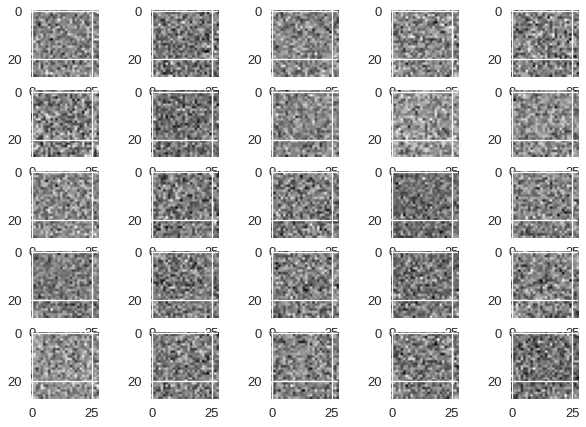

In [9]:
# Plot the decoded (de-compressed) layer images
get_layer_output = K.function([model.layers[0].input], [model.layers[2].output])
last_outputs = get_layer_output([X_train[:show_size**2]])[0]

total = 0

for i in range(show_size ** 2):
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total += 1

### Denoise Image Using an Autoencoder

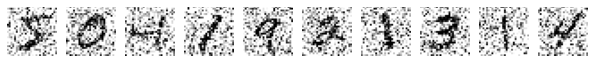

In [10]:
# Introducing noise to the image
noise_factor = 0.5
X_train_noisy = X_train + np.random.normal(loc=0., scale=noise_factor, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

def draw(data, row, col, n):
    """Function for visualization"""
    plt.subplot(row, col, n)
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis("off")

show_size = 10

for i in range(show_size):
    draw(X_train_noisy[i].reshape(28, 28), 1, show_size, i+1)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0750
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0310
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0295
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0288
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0282


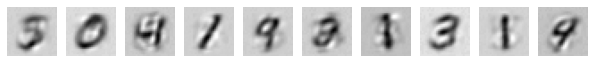

In [11]:
# Fit a model on noisy training dataset
model.fit(X_train_noisy, X_train, epochs=5)

# Prediction for denoised image
X_train_pred = model.predict(X_train_noisy)

for i in range(show_size):
    draw(X_train_pred[i].reshape(28, 28), 1, show_size, i+1)

Convolutional Neural Network (CNN)
----------------------------------
> In the world of image classification, the CNN has become the go-to algorithm to build efficient models. CNNs are simiar to an ordinary neural network, except that it explicitly assumes that the inputs are images, which allows us to encode certain properties into the architecture.
>
> Let's consider CIFAR-10 (Canadian Institute for Advanced Research), which is a standard computer vision and deep learning image dataset. It consists of 60,000 color photos of 32 by 32 pixels squared, with RGB for each pixel, divided into ten classes that include common objects such as airplanes, automobiles, birds, cats, deer, dog, frog, horse, ship, and truck. Essentially each image is of size $32 \times 32 \times 3$ (width $\times$ height $\times$ RGB color channels).
>
> A CNN consists of four main types of layers: input layer, convolution layer, pooling layer, and fully connected layer.
>
> The input layer will hold the raw pixel, so an image of CIFAR-10 will have $32 \times 32 \times 3$ dimensions at the input layer. The convolution layer will compute a dot product between the weights of a small local region from the input layer, so if we decide to have five filters, the resultant reduced dimension will be $32 \times 32 \times 5$. The ReLU layer will apply an elementwise activation function, which will not affect the dimension. The pool layer will down sample the spatial dimension along width and height, rsulting in dimensions of $16 \times 16 \times 5$. Finally, the fully conncected layer will compute the class score, and the resultant dimension will be a single vector $1 \times 1 \times 10$ (ten class scores). Each neuron in this layer is connected to all numbers in the previous volume.

In [12]:
import keras

if K.backend() == "tensorflow":
    K.set_image_data_format("channels_last")
else:
    K.set_image_data_format("channels_first")

from keras.datasets import cifar10
from keras.preprocessing import sequence

img_rows, img_cols = 32, 32
img_channels = 3

batch_size = 256
nb_classes = 10
epochs = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2
kernel_size = 3     # convolution kernel size

if K.image_data_format() == "channels_first":
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"{X_train.shape = }")
print(f"{X_train.shape[0]} train samples")
print(f"{X_test.shape[0]} test  samples")

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train.shape = (50000, 32, 32, 3)
50000 train samples
10000 test  samples


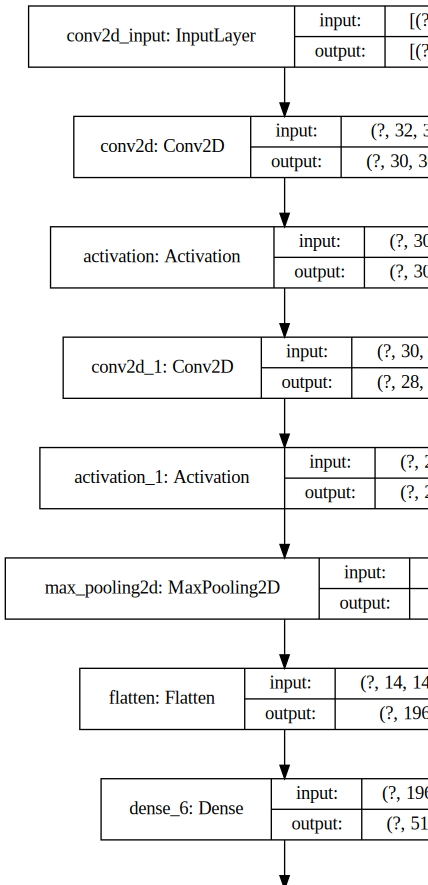

In [13]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten

# Define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, input_shape=input_shape),
    Activation("relu"),
    Conv2D(nb_filters, kernel_size),
    Activation("relu"),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Flatten(),
]
classification_layers = [
    Dense(512),
    Activation("relu"),
    Dense(nb_classes),
    Activation("softmax")
]

# Create a complete model
model = Sequential(feature_layers + classification_layers)

model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

In [14]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

1563/1563 - 45s - loss: 2.2728 - accuracy: 0.1480 - val_loss: 2.2391 - val_accuracy: 0.2165


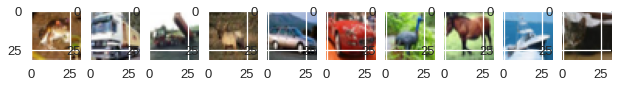

In [15]:
def draw(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data)

# Input layer (original image)
show_size = 10

for i in range(show_size):
    draw(X_train[i], 1, show_size, i+1)

first_layer.shape = (10, 30, 30, 10)


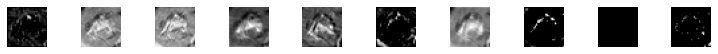

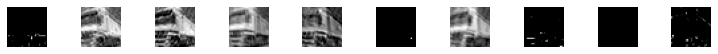

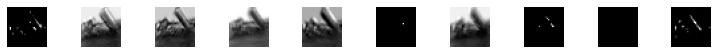

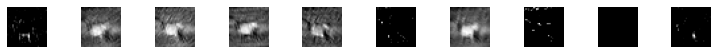

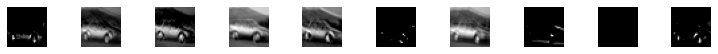

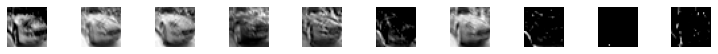

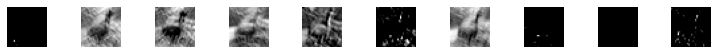

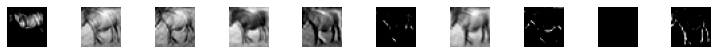

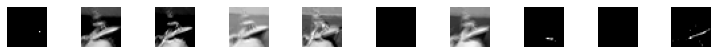

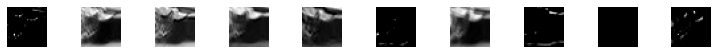

In [16]:
# First layer
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[:show_size]])[0]

print(f"{first_layer.shape = }")

def draw_digit(data, row, col):
    for j in range(row):
        plt.figure()
        for i in range(col):
            plt.subplot(row, col, i+1)
            plt.imshow(data[j, :, :, i])
            plt.axis("off")
        plt.tight_layout()

draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])

second_layers.shape = (10, 28, 28, 10)


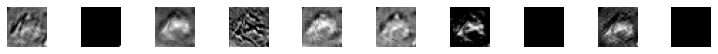

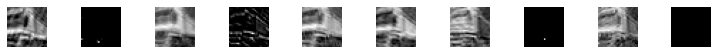

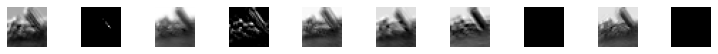

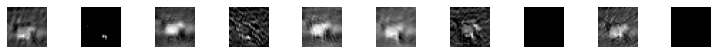

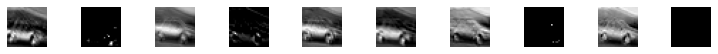

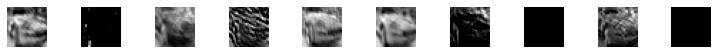

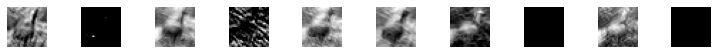

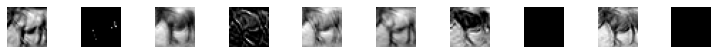

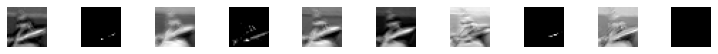

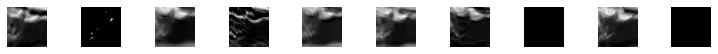

In [18]:
# Second layer
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layers = get_second_layer_output([X_train[:show_size]])[0]

print(f"{second_layers.shape = }")

draw_digit(second_layers, second_layers.shape[0], second_layers.shape[3])

third_layers.shape = (10, 14, 14, 10)


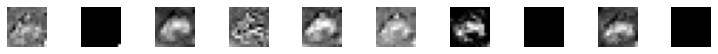

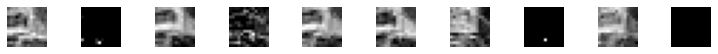

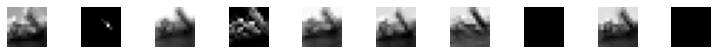

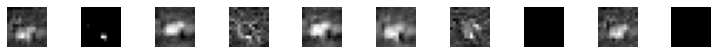

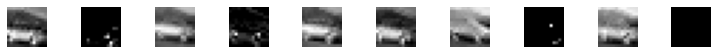

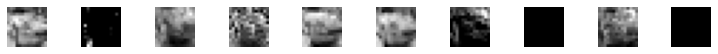

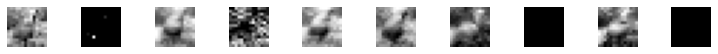

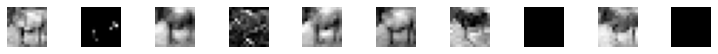

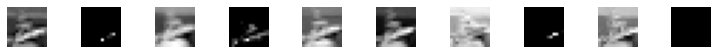

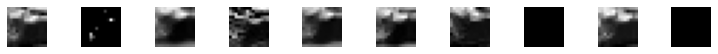

In [19]:
# Third layer
get_third_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_third_layer_output([X_train[:show_size]])[0]

print(f"{third_layers.shape = }")

draw_digit(third_layers, third_layers.shape[0], third_layers.shape[3])

CNN on MNIST Dataset
--------------------

In [22]:
if K.backend() == "tensorflow":
    K.set_image_data_format("channels_last")
else:
    K.set_image_data_format("channels_first")

nb_filters = 5  # number of filters
nb_pool = 2     # window size of pooling
nb_conv = 3     # window or kernel size of filter
epochs = 5
kernel_size = 3 # convolution kernel size
img_cols = 28
img_rows = 28

if K.image_data_format() == "channels_first":
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype("float32")

X_train /= 255
X_test /= 255

print(f"{X_train.shape = }")
print(f"{X_train.shape[0]} train samples")
print(f"{X_test.shape[0]} test  samples")

# Convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train.shape = (60000, 28, 28, 1)
60000 train samples
10000 test  samples


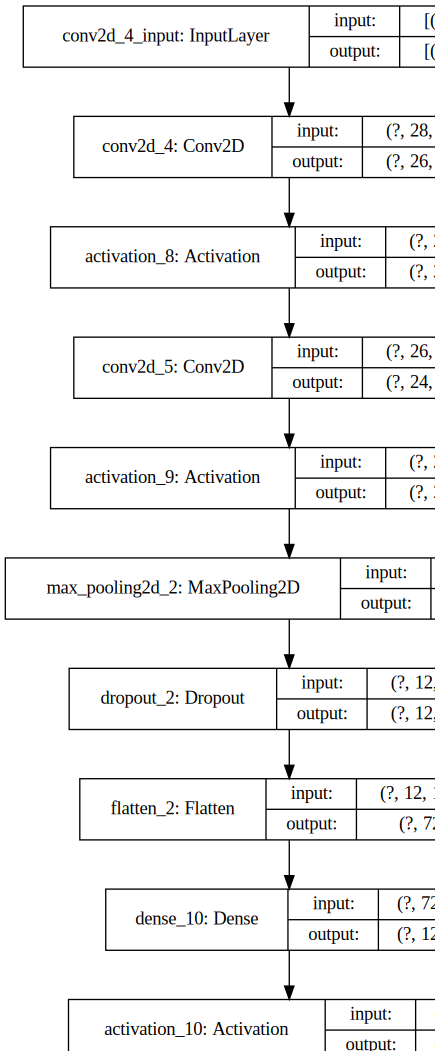

In [24]:
from keras.layers import Dropout

# Define two groups of layers: feature (convolutions) and classiication (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, input_shape=input_shape),
    Activation("relu"),
    Conv2D(nb_filters, kernel_size),
    Activation("relu"),
    MaxPooling2D(pool_size=nb_pool),
    Dropout(.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation("relu"),
    Dropout(.5),
    Dense(nb_classes),
    Activation("softmax")
]

# Create the complete model
model = Sequential(feature_layers + classification_layers)

model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

In [25]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 720)              

In [26]:
model.fit(X_train, Y_train, batch_size=256, epochs=epochs, validation_split=.2, verbose=2)

Epoch 1/5
188/188 - 11s - loss: 2.3081 - accuracy: 0.0987 - val_loss: 2.2961 - val_accuracy: 0.0794
Epoch 2/5
188/188 - 11s - loss: 2.3036 - accuracy: 0.1042 - val_loss: 2.2909 - val_accuracy: 0.0836
Epoch 3/5
188/188 - 11s - loss: 2.2997 - accuracy: 0.1110 - val_loss: 2.2858 - val_accuracy: 0.0903
Epoch 4/5
188/188 - 13s - loss: 2.2933 - accuracy: 0.1168 - val_loss: 2.2806 - val_accuracy: 0.0981
Epoch 5/5
188/188 - 13s - loss: 2.2884 - accuracy: 0.1209 - val_loss: 2.2754 - val_accuracy: 0.1084


### Visualization of Layers

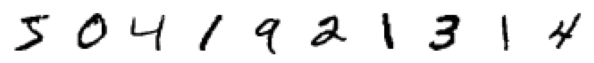

In [62]:
def draw(data, row, col, n):
    plt.subplot(row, col, n)
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis("off")

def draw_digit(data, row, col):
    for j in range(row):
        plt.figure(figsize=(8, 8))
        for i in range(col):
            plt.subplot(row, col, i+1)
            plt.imshow(data[j, : , :, i], cmap=plt.cm.gray_r)
            plt.axis("off")
        plt.tight_layout()

# Sample input layer (original image)
show_size = 10

for i in range(show_size):
    draw(X_train[i].reshape(28, 28), 1, show_size, i+1)

first_layer.shape = (10, 26, 26, 5)


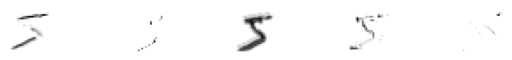

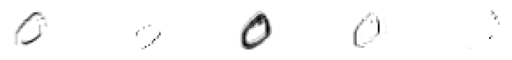

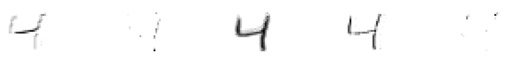

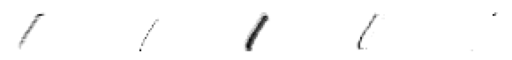

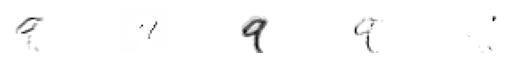

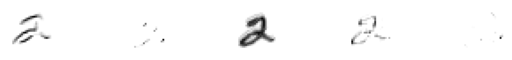

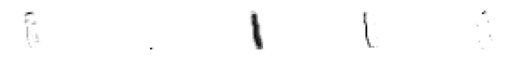

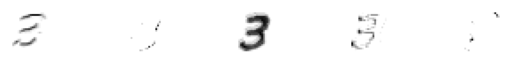

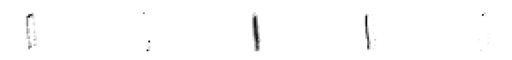

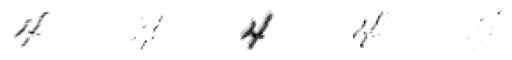

In [63]:
# First layer with 5 filters
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[:show_size]])[0]

print(f"{first_layer.shape = }")

draw_digit(first_layer, first_layer.shape[0], first_layer.shape[3])

Recurrent Neural Network (RNN)
------------------------------
> The MLP (feedforward network) is not known to do well on a sequential events model -- such as the probabilistic language model -- for predicting the next word based on the previous word at every given point. RNN architecture addresses this issue. It is similar to MLP except that it has a feedback loop, which means it feeds previous time steps into the current step. This type of architecture generates sequences to simulate the situation and create synthetic data. This makes it the ideal modeling choice to work on sequence data such as speech text mining, image captioning, time series prediction, robot control, language modeling, etc.
>
> The drawback in the general RNN architecture is that it can be memory heavy, and hard to train for long-term temporal dependency (i.e., the context of long text should be known at any given stage).

### Long Short Term Memory (LSTM)
> LSTM is an implementation of improved RNN architecture to address the issues of general RNN, and it enables long-range dependencies. It is designed to have better memory through linear memory cells surrounded by a set of gate units used to control the flow of information -- when information should enter the memory, when to forget, and when to output.

In [66]:
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80 # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

print(len(X_train), "train sequences")
print(len(X_test), "test  sequences")

print("Pad sequences (samples x time")

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

print(f"{X_train.shape = }")
print(f"{X_test.shape  = }")


Loading data...
25000 train sequences
25000 test  sequences
Pad sequences (samples x time
X_train.shape = (25000, 80)
X_test.shape  = (25000, 80)


In [67]:
from keras.layers import Embedding

# Model configuration
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, recurrent_dropout=.2, dropout=.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))

# Try using different optimizers and different optimizer configs
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 130s 167ms/step - loss: 0.4315 - accuracy: 0.7951 - val_loss: 0.3560 - val_accuracy: 0.8407
Epoch 2/5
782/782 [==============================] - 126s 161ms/step - loss: 0.2575 - accuracy: 0.8956 - val_loss: 0.3847 - val_accuracy: 0.8368
Epoch 3/5
782/782 [==============================] - 106s 136ms/step - loss: 0.1658 - accuracy: 0.9375 - val_loss: 0.5105 - val_accuracy: 0.8322
Epoch 4/5
782/782 [==============================] - 83s 107ms/step - loss: 0.1093 - accuracy: 0.9592 - val_loss: 0.5397 - val_accuracy: 0.8301
Epoch 5/5
782/782 [==============================] - 87s 111ms/step - loss: 0.0728 - accuracy: 0.9744 - val_loss: 0.6028 - val_accuracy: 0.8200


In [68]:
# Evaluate
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print(f"{train_score = }")
print(f"{train_acc = }")
print(f"{test_score = }")
print(f"{test_acc = }")

782/782 [==============================] - 21s 26ms/step - loss: 0.6028 - accuracy: 0.8200
train_score = 0.038366109132766724
train_acc = 0.9895600080490112
test_score = 0.6027653217315674
test_acc = 0.8199999928474426


Transfer Learning
-----------------
> Transfer learning is an area ML that aims to utilize the knowledge gained while solving one problem to solve a different but related problem.
>
> Let's train a simple CNN model of two level layers (a feature layer and a classification layer) on the first 5 digits (0 to 4) of the MNIST dataset, then apply transfer learning to freeze the features layer and fine-tune dense layers for the classification of digits 5 to 9.

In [69]:
batch_size = 128
nb_classes = 5
epochs = 5

img_rows, img_cols = 28, 28 # Input image dimensions
nb_filters = 32 # number of convolutional filters to use
pool_size = 2   # size of pooling area for max pooling
kernel_size = 2 # convolution kernel size

input_shape = (img_rows, img_cols, 1)

# The data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create two datasets: one with digits below 5 and one with 5 and above
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5    # make classes start at 0
X_test_gte5 = X_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

# Train model for digits 0 to 4
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape((train[0].shape[0],) + input_shape).astype("float32")
    X_test = test[0].reshape((test[0].shape[0],) + input_shape).astype("float32")
    X_train /= 255
    X_test /= 255
    print(f"{X_train.shape = }")
    print(X_train.shape[0], "train samples")
    print(X_test.shape[0], "test  samples")

    # Convert class vectors to binary class matrices
    Y_train = np_utils.to_categorical(train[1], nb_classes)
    Y_test = np_utils.to_categorical(test[1], nb_classes)

    model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print("Test score:", score[0])
    print("Test accuracy:", score[1])

# Define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size, padding="valid", input_shape=input_shape),
    Activation("relu"),
    Conv2D(nb_filters, kernel_size),
    Activation("relu"),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(.25),
    Flatten()
]
    
classification_layers = [
    Dense(128),
    Activation("relu"),
    Dropout(.5),
    Dense(nb_classes),
    Activation("softmax")
]

# Create a complete model
model = Sequential(feature_layers + classification_layers)

# Train the model for 5-digit classification [0..4]
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)

X_train.shape = (30596, 28, 28, 1)
30596 train samples
5139 test  samples
Epoch 1/5
240/240 [==============================] - 23s 95ms/step - loss: 1.6091 - accuracy: 0.2353 - val_loss: 1.5887 - val_accuracy: 0.3534
Epoch 2/5
240/240 [==============================] - 23s 97ms/step - loss: 1.5789 - accuracy: 0.3142 - val_loss: 1.5557 - val_accuracy: 0.4925
Epoch 3/5
240/240 [==============================] - 22s 92ms/step - loss: 1.5478 - accuracy: 0.4039 - val_loss: 1.5211 - val_accuracy: 0.6879
Epoch 4/5
240/240 [==============================] - 26s 109ms/step - loss: 1.5147 - accuracy: 0.5076 - val_loss: 1.4839 - val_accuracy: 0.8101
Epoch 5/5
240/240 [==============================] - 21s 87ms/step - loss: 1.4778 - accuracy: 0.5951 - val_loss: 1.4423 - val_accuracy: 0.8611
Test score: 1.4422836303710938
Test accuracy: 0.8610624670982361


> Transfer existing trained model on 0 to 4 to build the model for digits 5 to 9

In [70]:
# Freeze feature layers and rebuild the model
for layer in feature_layers:
    layer.trainable = False

# Transfer: train dense layers for new classification task [5..9]
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5, y_test_gte5), nb_classes)

X_train.shape = (29404, 28, 28, 1)
29404 train samples
4861 test  samples
Epoch 1/5
230/230 [==============================] - 8s 35ms/step - loss: 1.5872 - accuracy: 0.2862 - val_loss: 1.5660 - val_accuracy: 0.3979
Epoch 2/5
230/230 [==============================] - 8s 37ms/step - loss: 1.5629 - accuracy: 0.3322 - val_loss: 1.5399 - val_accuracy: 0.4585
Epoch 3/5
230/230 [==============================] - 7s 33ms/step - loss: 1.5393 - accuracy: 0.3878 - val_loss: 1.5143 - val_accuracy: 0.5431
Epoch 4/5
230/230 [==============================] - 8s 33ms/step - loss: 1.5170 - accuracy: 0.4445 - val_loss: 1.4888 - val_accuracy: 0.6186
Epoch 5/5
230/230 [==============================] - 9s 40ms/step - loss: 1.4924 - accuracy: 0.4992 - val_loss: 1.4630 - val_accuracy: 0.6737
Test score: 1.4630056619644165
Test accuracy: 0.673729658126831


Reinforcement Learning
======================
> Reinforcement learning is a goal-oriented learning method based on interaction with its environment. The objective is getting an agent to act in an environment in order to maximize its rewards. Here the agent is an intelligent program, and the environment is the external condition.
>
> According to the paper published by Deepmind Technologies in 2013, the Q-learning rule for updating status is given by:
\begin{equation}
Q[s, a]_\text{new} = Q[s, a]_\text{prev} + \alpha \cdot (r + \gamma \cdot \max(s, a) - Q[s, a]_\text{prev}),
\end{equation}
> where
> - $\alpha$ is the learning rate,
> - $r$ is a reward for the latest action,
> - $\gamma$ is the discounted factor, and
> - $\max(s, a)$ is the estimate of new value from best action.

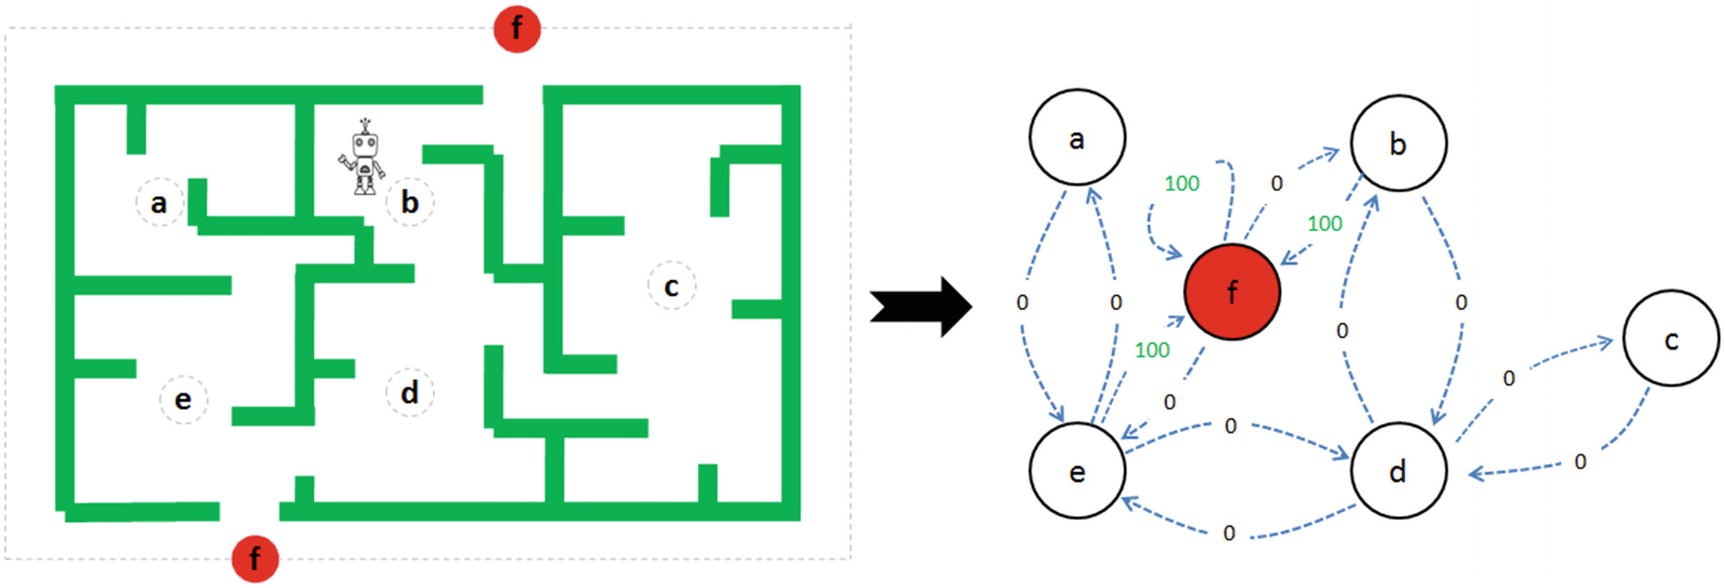

In [77]:
from IPython.display import Image
Image("../data/maze.png")

In [76]:
help(display)

Help on function display in module IPython.core.display:

display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)
    Display a Python object in all frontends.
    
    By default all representations will be computed and sent to the frontends.
    Frontends can decide which representation is used and how.
    
    In terminal IPython this will be similar to using :func:`print`, for use in richer
    frontends see Jupyter notebook examples with rich display logic.
    
    Parameters
    ----------
    objs : tuple of objects
        The Python objects to display.
    raw : bool, optional
        Are the objects to be displayed already mimetype-keyed dicts of raw display data,
        or Python objects that need to be formatted before display? [default: False]
    include : list, tuple or set, optional
        A list of format type strings (MIME types) to include in the
        format data dict. If this is set *only* the format types included

In [72]:
from matplotlib.collections import LineCollection

# Define the reward/link connection graph
R = np.array([
    [-1, -1, -1, -1, 0, -1],
    [-1, -1, -1, 0, -1, 100],
    [-1, -1, -1, 0, -1, -1],
    [-1, 0, 0, -1, 0, -1],
    [0, -1, -1, 0, -1, 100],
    [-1, 0, -1, -1, 0, 100]
    ]).astype("float32")
Q = np.zeros_like(R)

> The -1's in the table means there isn't a link between nodes. For example, State 'a' cannot go to State 'b'.

In [91]:
# Learning parameter
gamma = .8

# Initialize random_state
initial_state = np.random.randint(0, 4)

def available_actions(state):
    """Return all available actions in the state given as an argument"""
    current_state_row = R[state]
    av_act = np.where(current_state_row >= 0)[0]
    return av_act

def sample_next_action(available_actions_range):
    """Chooses at random which action to e performed within the range of all the available actions.
    """
    next_action = int(np.random.choice(available_actions_range, 1))
    return next_action

def update(current_state, action, gamma):
    """Updates the Q matrix according to the path selected and the Q learning algorithm.
    """
    max_index = np.where(Q[action] == np.max(Q[action]))[0]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

# Train over 100 iterations, re-iterate the process above
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state, action, gamma)

# Normalize the "trained" Q matrix
print("Trained Q matrix:\n", Q / np.max(Q) * 100)

# Testing
current_state = 2
steps = [current_state]

while current_state != 5:
    next_step_index = np.where(Q[current_state] == np.max(Q[current_state]))[0]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Best sequence path:", steps)

Trained Q matrix:
 [[  0.         0.         0.         0.        79.97079    0.      ]
 [  0.         0.         0.        63.976627   0.       100.      ]
 [  0.         0.         0.        64.         0.         0.      ]
 [  0.        79.99999   51.181297   0.        79.97079    0.      ]
 [ 63.976627   0.         0.        63.736874   0.        99.963486]
 [  0.        79.99999    0.         0.        79.97079   99.963486]]
Best sequence path: [2, 3, 1, 5]


In [87]:
R[initial_state] >= 0

array([False, False, False,  True, False, False])

Summary
-------
> In this chapter you have learned briefly about various topics of deep learning technique using ANNs, starting from single perceptron, to multilayer perceptron, to more complex forms of deep neural networks such as CNN and RNN. You have learned about the various issues associated with image data and how researchers have tried to mimic the human brain for building models that can solve complex problems related to computer vision and text mining using a convolutional neural network and recurrent neural network, respectively. You also learned how autoencoders can be used to compress/decompress data or remove noise from image data. You learned about the widely popular RBN, which can learn the probabilistic distribution in the input data, enabling us to build better models. You learned about the transfer learning that helps us to use knowledge from one model to another model of similar nature. Finally, we briefly looked at a simple example of reinforcement learning using Q-leanring.